<a href="https://colab.research.google.com/github/rajni0829/AIbyMyCap/blob/master/My_First_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import sys
import scipy
import matplotlib
import pandas as pd
import sklearn
print(sys.version)
print(scipy.__version__)
print(matplotlib.__version__)

3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0]
1.4.1
3.2.2


In [7]:
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier


In [27]:
url = 'https://gist.github.com/curran/a08a1080b88344b0c8a7'
# data = pd.read_csv('https://github.com/jbrownlee/Datasets/blob/master/iris.csv')

names = ['sepal-length','sepal-width','petal-length','petal-width','class']
dataset = pd.read_csv('/content/Iris.csv')


In [21]:
dataset

,1,5.1,3.5,1.4,0.2,Iris-setosa
0,2,4.9,3.0,1.4,0.2,Iris-setosa
1,3,4.7,3.2,1.3,0.2,Iris-setosa
2,4,4.6,3.1,1.5,0.2,Iris-setosa
3,5,5.0,3.6,1.4,0.2,Iris-setosa
4,6,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...,...
144,146,6.7,3.0,5.2,2.3,Iris-virginica
145,147,6.3,2.5,5.0,1.9,Iris-virginica
146,148,6.5,3.0,5.2,2.0,Iris-virginica
147,149,6.2,3.4,5.4,2.3,Iris-virginica


In [22]:
dataset.shape

(149, 6)

In [23]:
dataset.head

<bound method NDFrame.head of        1  5.1  3.5  1.4  0.2     Iris-setosa
0      2  4.9  3.0  1.4  0.2     Iris-setosa
1      3  4.7  3.2  1.3  0.2     Iris-setosa
2      4  4.6  3.1  1.5  0.2     Iris-setosa
3      5  5.0  3.6  1.4  0.2     Iris-setosa
4      6  5.4  3.9  1.7  0.4     Iris-setosa
..   ...  ...  ...  ...  ...             ...
144  146  6.7  3.0  5.2  2.3  Iris-virginica
145  147  6.3  2.5  5.0  1.9  Iris-virginica
146  148  6.5  3.0  5.2  2.0  Iris-virginica
147  149  6.2  3.4  5.4  2.3  Iris-virginica
148  150  5.9  3.0  5.1  1.8  Iris-virginica

[149 rows x 6 columns]>

In [24]:
dataset.describe()

,1,5.1,3.5,1.4,0.2
count,149.000000,149.000000,149.000000,149.000000,149.000000
mean,76.000000,5.848322,3.051007,3.774497,1.205369
std,43.156691,0.828594,0.433499,1.759651,0.761292
min,2.000000,4.300000,2.000000,1.000000,0.100000
25%,39.000000,5.100000,2.800000,1.600000,0.300000
50%,76.000000,5.800000,3.000000,4.400000,1.300000
75%,113.000000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [28]:
dataset.groupby('Iris-setosa').size()

Iris-setosa
Iris-setosa        49
Iris-versicolor    50
Iris-virginica     50
dtype: int64

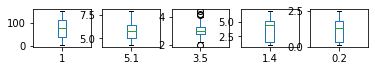

In [30]:
dataset.plot(kind='box',subplots='True',layout=(5,5),sharex=False,sharey=False)
pyplot.show()

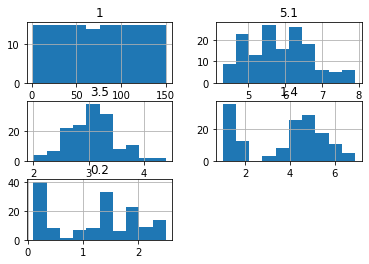

In [31]:
dataset.hist()
pyplot.show()

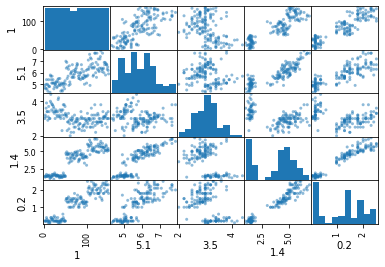

In [34]:
#multivariate plots - iteraction bw var
scatter_matrix(dataset)
pyplot.show()

In [45]:
#creating a validation set
#splitting dtset
array = dataset.values
X = array[:, 0:4]
y = array[:,4]
X_train,X_validation,Y_train,Y_validation = train_test_split(X,y,test_size=0.2,random_state=1)


In [52]:
#building models
models = []
models.append(('LR',LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC(gamma='auto')))

In [53]:
from scipy.sparse.construct import random
# evaluate created models
results = []
names = []
for name,model in models:
  kfold = StratifiedKFold(n_splits=10,random_state=None)
  cv_results = cross_val_score(model,X_train,Y_train,cv=kfold,scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  print(name,cv_results.mean(),cv_results.std())


ValueError: ignored

ValueError: ignored

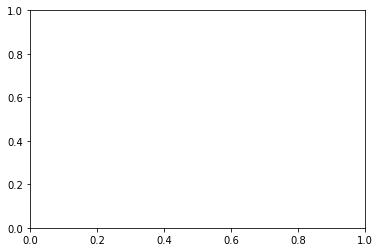

In [43]:
# compare models
pyplot.boxplot(results,labels=names)
pyplot.title('Algo Comparison')
pyplot.show()

In [50]:
model = SVC(gamma='auto')
model.fit(X_train,Y_train)
predictions = model.predict(X_validation)


ValueError: ignored

In [51]:
print(accuracy_score(Y_validation,predictions))
print(confusion_matrix(Y_validation,predictions))
print(classification_report(Y_validation,predictions))

NameError: ignored